# Requirements 📋✅

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Needed for the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Needed for the CNN
from tensorflow.keras import layers
from tensorflow.keras import models

2023-11-28 15:49:09.057240: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 15:49:09.057539: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 15:49:09.119246: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-28 15:49:09.325016: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-28 15:49:13.363001: W tensorflow/compiler/tf2

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
from tensorflow import convert_to_tensor

# Hopefully fixing cuda

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [4]:
!echo $CUDA_VISIBLE_DEVICES

-1


# The Dataset location 📍

In [5]:
labels = pd.DataFrame(['00030001.rgb.png', 'lunge_right', '30001', 1]).T

In [6]:
labels

,0,1,2,3
0,00030001.rgb.png,lunge_right,30001,1


In [7]:
data_images = os.path.dirname('00030001.rgb.png')
data_labels = labels

In [ ]:
pwd

In [8]:
data_images = os.path.join(os.getcwd(), '00030001.rgb.png')

In [12]:
import matplotlib.image as mpimg
img = mpimg.imread(data_images)

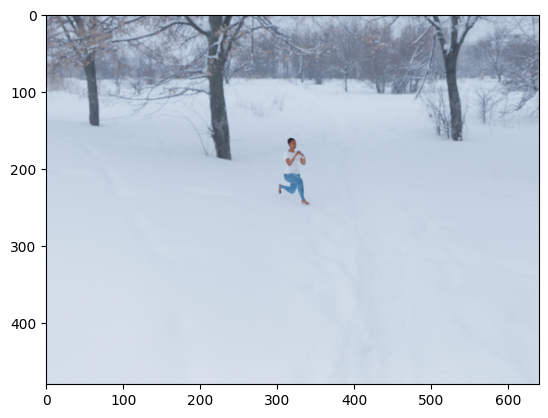

In [13]:
plt.imshow(img)

In [20]:
X_train = img
y_train = data_labels

In [21]:
X_train.shape

(480, 640, 4)

In [16]:
# Check the different shapes
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

NameError: name 'X_test' is not defined

In [17]:
X_train.shape

(480, 640, 4)

## Exploring the Dataset 🧭🔍

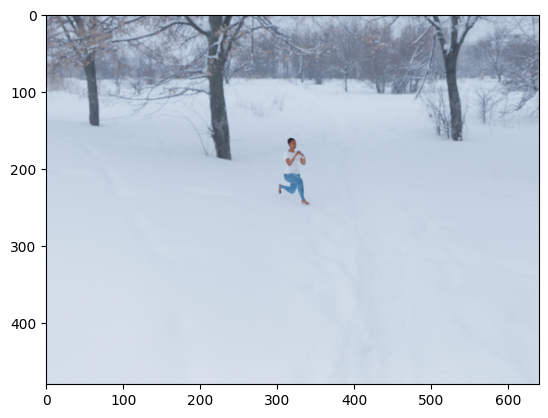

In [23]:
# Check whether the X_train contains immages
plt.imshow(X_train)

## Preprocessing ⚙️

In [63]:
X_train[:,:,3]

array([[[0.0023837 , 0.00252211, 0.0028143 , 0.00392157],
        [0.00219915, 0.00235294, 0.00266052, 0.00392157],
        [0.00226067, 0.00244521, 0.00276817, 0.00392157],
        ...,
        [0.00327566, 0.00341407, 0.00358324, 0.00392157],
        [0.00327566, 0.00342945, 0.00358324, 0.00392157],
        [0.00327566, 0.00342945, 0.00359862, 0.00392157]]], dtype=float32)

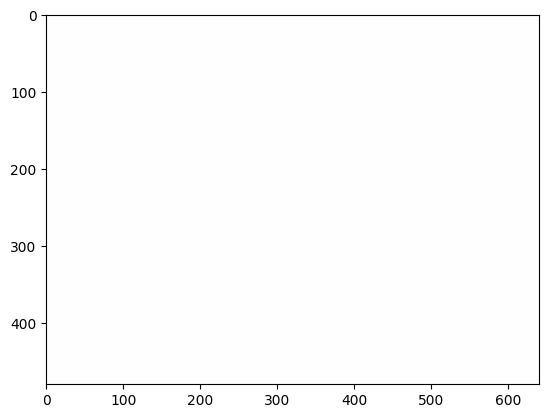

In [68]:
# Check whether the image still shows
plt.imshow(X_train[0])

In [67]:
X_train.shape

(1, 480, 640, 4)

## Target Encoding 🎯

> This might not be necessary as we are using tf.utils.immage_dataset_from.... to create our fixed numeric labels 😊

In [ ]:
# Check this line to see what we pass to the One Hot Encoder
data_labels_tmp['pose_variation_enum']

In [ ]:
## unnecessary
# Setup the One Hot Encoder
data_labels_tmp = data_labels.copy()
# labels = ['squats', 'pushups', 'lunge_left', 'lunge_right']
ohe = OneHotEncoder()
ohe.fit(data_labels_tmp['pose_variation'])
data_labels_tmp = ohe.transform(data_labels_tmp['pose_variation'])

# The CNN 🖥️🧠

In [ ]:
# Check the shape of the current X_train
X_train.shape[1:]

In [ ]:
# Check y_train shape
y_train.shape

## Initialization Function for the CNN 🦾🤖🦿

In [25]:
X_train = np.expand_dims(X_train, axis=0)

In [26]:
y_train.shape[-1]

4

In [88]:
def initialize_CNN():
    model = models.Sequential()
    
    # Build of the Model
    model.add(layers.Conv2D(filters=8, kernel_size=(4,4), input_shape=X_train.shape[1:], activation='relu', padding='same'))
    model.add(layers.MaxPool2D((2,2)))
    model.add(layers.Conv2D(16,(3,3), activation='relu'))
    model.add(layers.MaxPool2D((2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compilation of the Model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [89]:
tmp_first_CNN = initialize_CNN()
tmp_first_CNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 480, 640, 8)       520       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 240, 320, 8)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 238, 318, 16)      1168      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 119, 159, 16)      0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 302736)            0         
                                                                 
 dense_8 (Dense)             (None, 10)               

In [94]:
final_model = models.Sequential()

final_model.add(layers.Rescaling(scale=1./255))
final_model.add(tmp_first_CNN)

In [95]:
final_model.layers

In [90]:
es = EarlyStopping(patience=30, restore_best_weights=True)

In [91]:
y_train = np.array([1])
y_train

array([1])

In [92]:
history = tmp_first_CNN.fit(X_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 242ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 0s 222ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 189ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 0s 401ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 314ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 244ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 213ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 193ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 224ms/step - loss: 0.

1/1 [==============================] - 0s 240ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 80/100
1/1 [==============================] - 0s 223ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 81/100
1/1 [==============================] - 0s 184ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 82/100
1/1 [==============================] - 0s 240ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 83/100
1/1 [==============================] - 0s 363ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 84/100
1/1 [==============================] - 0s 406ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 85/100
1/1 [==============================] - 0s 298ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 86/100
1/1 [==============================] - 0s 197ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 87/100
1/1 [==============================] - 0s 192ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 88/100
1/1 [==============================] - 0s 192ms/step - loss: 0.0

In [70]:
y_train

,0,1,2,3
0,00030001.rgb.png,lunge_right,30001,1
